# EDA
- requirements
    - `pip install pandas`
    - `pip install matplotlib`
    - `pip install seaborn`
    - `pip install plotly`
    - `pip install xlrd`

EDA is basically done with pandas, while other 3 are for visualizing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [67]:
topmovies = pd.read_excel('../top_movies_list.xlsx')

In [12]:
px.line(topmovies,x='rating',hover_name='title')

# reading data with csv

In [16]:
pokemon = pd.read_csv('data/pokemon.csv',index_col='#')
pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [18]:
pokemon['Type 1']

#
1        Grass
2        Grass
3        Grass
3        Grass
4         Fire
        ...   
719       Rock
719       Rock
720    Psychic
720    Psychic
721       Fire
Name: Type 1, Length: 800, dtype: object

In [19]:
type(pokemon)

pandas.core.frame.DataFrame

In [20]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 95.8+ KB


In [21]:
pokemon.describe(include='all')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800,800,414,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Magby,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,NaN,NaN,NaN,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,NaN,NaN,NaN,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,NaN,NaN,NaN,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,NaN,NaN,NaN,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,NaN,NaN,NaN,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,NaN,NaN,NaN,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [44]:
name = '1. The Shawshank Redemption(1994)'

In [52]:
print('0 ->',name.split('(')[0]) # left item
print('1 ->',name.split('(')[1]) # right item

0 -> 1. The Shawshank Redemption
1 -> 1994)


In [53]:
year = '1994)'
year[:-1]

'1994'

In [42]:
def clean_movie(name):
    name = name.split('(')[0] # get the numbering & name
    return name.split('.')[1].strip() # remove numbering from name

In [65]:
def clean_year(name):
    year = name.split('(')[1] # get the year only
    return int(year[:-1]) # remove the bracket

In [68]:
# this will add two column for names & year cleaned from title column
topmovies['names'] = topmovies['title'].apply(clean_movie)
topmovies['year'] = topmovies['title'].apply(clean_year)
topmovies

,title,rating,names,year
0,1. The Shawshank Redemption(1994),9.2,The Shawshank Redemption,1994
1,2. The Godfather(1972),9.1,The Godfather,1972
2,3. The Godfather: Part II(1974),9.0,The Godfather: Part II,1974
3,4. The Dark Knight(2008),9.0,The Dark Knight,2008
4,5. 12 Angry Men(1957),8.9,12 Angry Men,1957
...,...,...,...,...
245,246. La battaglia di Algeri(1966),8.0,La battaglia di Algeri,1966
246,247. The Terminator(1984),8.0,The Terminator,1984
247,248. Aladdin(1992),8.0,Aladdin,1992
248,249. Kis Uykusu(2014),8.0,Kis Uykusu,2014


In [69]:
# drop the old title column
topmovies.drop(columns=['title'],inplace=True)

In [70]:
topmovies

,rating,names,year
0,9.2,The Shawshank Redemption,1994
1,9.1,The Godfather,1972
2,9.0,The Godfather: Part II,1974
3,9.0,The Dark Knight,2008
4,8.9,12 Angry Men,1957
...,...,...,...
245,8.0,La battaglia di Algeri,1966
246,8.0,The Terminator,1984
247,8.0,Aladdin,1992
248,8.0,Kis Uykusu,2014


In [71]:
topmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  250 non-null    float64
 1   names   250 non-null    object 
 2   year    250 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


In [73]:
topmovies.sort_values(by='year',inplace=True)

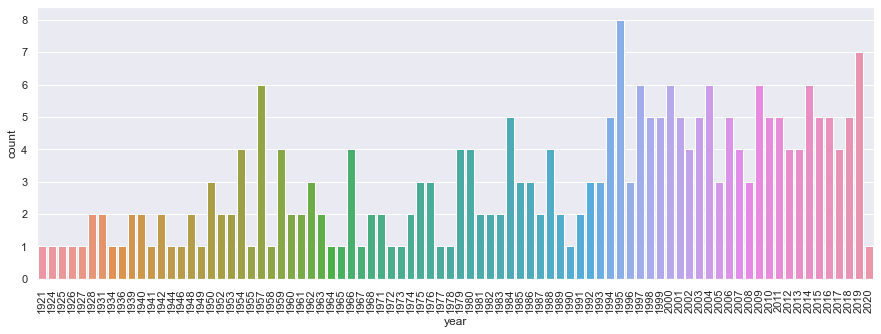

In [79]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot('year',data=topmovies)
plt.xticks(rotation=90)
plt.show()

In [81]:
px.scatter(topmovies,x='year',y='rating',hover_name='names',color='rating')